In [64]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
def calculate_mean_velocity(file_path):
    # Read the data from the .txt file
    data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['time', 'x', 'y', 'z', 'x_smooth', 'y_smooth', 'z_smooth'])
    
    # Extract relevant columns
    x_smooth = np.array(data['x_smooth'])
    y_smooth = np.array(data['y_smooth'])
    z_smooth = np.array(data['z_smooth'])
    time = np.array(data['time'])

    # Initialize arrays for velocities and time differences
    v_arr = np.zeros(len(data))
    t_arr = np.zeros(len(data)-1)

    # Loop to calculate velocity using central difference
    for i in range(1, len(data)-1):
        t_next = time[i+1]
        x_next = x_smooth[i+1]
        y_next = y_smooth[i+1]
        z_next = z_smooth[i+1]
        
        t_prev = time[i-1]
        x_prev = x_smooth[i-1]
        y_prev = y_smooth[i-1]
        z_prev = z_smooth[i-1]
        
        # Calculate radial distance between next and previous points
        r_diff = np.sqrt((x_next - x_prev)**2 + (y_next - y_prev)**2 + (z_next - z_prev)**2)
        dt = t_next - t_prev
        
        # Velocity at the current point using central difference
        v_arr[i] = r_diff / dt
        t_arr[i-1] = dt

    # Calculate the mean velocity
    mean_velocity = np.mean(v_arr[1:-1])  # Exclude first and last points since they are zeros
    
    return mean_velocity , v_arr

In [41]:
def build_mean_velocity_array_from_folders_WT(root_dir):
    mean_velocities_WT = []

    # Iterate through all folders and subfolders in the root directory
    for foldername, subfolders, filenames in os.walk(root_dir):
        # Find all .txt files in the current folder
        for file_path in glob.glob(os.path.join(foldername, '*.txt')):
            mean_velocity = calculate_mean_velocity(file_path)
            mean_velocities_WT.append(mean_velocity)
            

    return np.array(mean_velocities_WT)

In [26]:
def build_mean_velocity_array_from_folders_evolved(root_dir):
    mean_velocities_ev = []

    # Iterate through all folders and subfolders in the root directory
    for foldername, subfolders, filenames in os.walk(root_dir):
        # Find all .txt files in the current folder
        for file_path in glob.glob(os.path.join(foldername, '*.txt')):
            mean_velocity = calculate_mean_velocity(file_path)
            mean_velocities_ev.append(mean_velocity)
            

    return np.array(mean_velocities_ev)

In [27]:
def build_mean_velocity_array_from_folders_evolved_disk(root_dir):
    mean_velocities_ev_disk = []

    # Iterate through all folders and subfolders in the root directory
    for foldername, subfolders, filenames in os.walk(root_dir):
        # Find all .txt files in the current folder
        for file_path in glob.glob(os.path.join(foldername, '*.txt')):
            mean_velocity = calculate_mean_velocity(file_path)
            mean_velocities_ev_disk.append(mean_velocity)
            

    return np.array(mean_velocities_ev_disk)

In [35]:
mean_velo_WT = build_mean_velocity_array_from_folders_WT('FINALDATA/WT_planktonic_final/')

In [36]:
mean_velo_ev = build_mean_velocity_array_from_folders_evolved('FINALDATA/evolved_planktonic_final/')

In [37]:
mean_velo_ev_disk = build_mean_velocity_array_from_folders_evolved_disk('FINALDATA/evolved+disk_planktonic_final/')

In [38]:
print('Length of WT', len(mean_velo_WT), 'Length of ev', len(mean_velo_ev), 'Length of ev+disk', len(mean_velo_ev_disk))

Length of WT 27152 Length of ev 43441 Length of ev+disk 36150


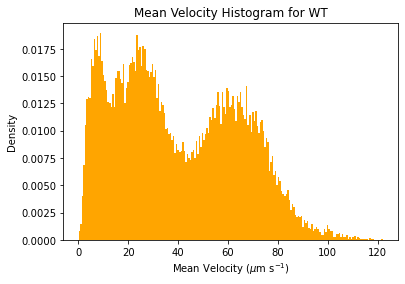

In [76]:
velocity = mean_velo_WT
no_of_bins = 200
#Showing hist with the 0 values

# Plot histogram for velocity
plt.hist(velocity, bins=no_of_bins, density=True, color='orange')
plt.title('Mean Velocity Histogram for WT')
plt.xlabel(r'Mean Velocity ($\mu$m s$^{-1}$)')
plt.ylabel('Density')
plt.savefig(f'WT_mean_velo_hist.png', format='png')
# Show plot
plt.show()

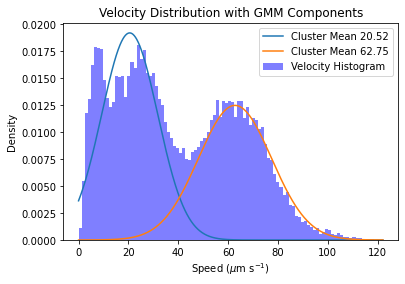

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Example velocity data (replace this with your actual velocity array)
velocities = mean_velo_WT

# Fit a Gaussian Mixture Model with 2 or more components
n_components = 2  # Adjust based on observed data; 2 is a good starting point
gmm = GaussianMixture(n_components=n_components)
gmm.fit(velocities.reshape(-1, 1))

# Get the mean and standard deviation of each Gaussian component
means = gmm.means_.flatten()
std_devs = np.sqrt(gmm.covariances_).flatten()
weights = gmm.weights_

# Plot histogram of velocities
plt.hist(velocities, bins=100, density=True, alpha=0.5, color='blue', label='Velocity Histogram')

# Overlay each Gaussian component on the histogram
x = np.linspace(0, max(velocities), 1000)
for mean, std, weight in zip(means, std_devs, weights):
    plt.plot(x, weight * np.exp(-0.5 * ((x - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi)), label=f'Cluster Mean {mean:.2f}')

plt.xlabel(r'Speed ($\mu$m s$^{-1}$)')
plt.ylabel('Density')
plt.title('Velocity Distribution with GMM Components')
plt.legend()
plt.show()

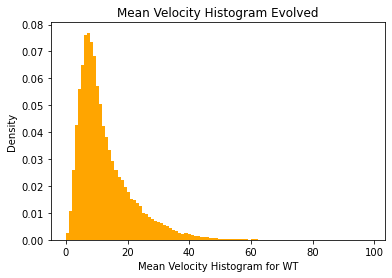

In [78]:
velocity = mean_velo_ev
no_of_bins = 100
#Showing hist with the 0 values

# Plot histogram for velocity
plt.hist(velocity, bins=no_of_bins, density=True, color='orange')
plt.title('Mean Velocity Histogram Evolved')
plt.xlabel('Mean Velocity Histogram for WT')
plt.ylabel('Density')
plt.savefig(f'velo_plots/ev_meanv.png', format='png')
# Show plot
plt.show()

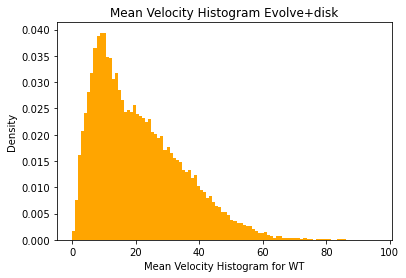

In [74]:
velocity = mean_velo_ev_disk
no_of_bins = 100
#Showing hist with the 0 values

# Plot histogram for velocity
plt.hist(velocity, bins=no_of_bins, density=True, color='orange')
plt.title('Mean Velocity Histogram Evolve+disk')
plt.xlabel('Mean Velocity Histogram for WT')
plt.ylabel('Density')
plt.savefig(f'velo_plots/ev_d_meanv.png', format='png')
# Show plot
plt.show()